In [5]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

import geopy
import seaborn as sns
import plotly.graph_objs as go
from pandasgui import show
import plotly.express as px


from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, f1_score, classification_report
pd.options.mode.chained_assignment = None

In [7]:
df = pd.read_csv('london_airbnb.csv')
df.describe()


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8.506800e+04,8.506800e+04,0.0,85068.000000,85068.000000,85068.000000,85068.000000,85068.000000,65062.000000,85068.000000,85068.000000
mean,2.319997e+07,8.514442e+07,NaN,51.509798,-0.128343,122.336766,4.148105,17.471152,1.201995,22.151150,118.471987
std,1.132475e+07,8.603532e+07,NaN,0.046341,0.093034,220.749123,16.681720,36.789578,1.402728,110.654631,134.840097
min,1.155100e+04,2.697000e+03,NaN,51.294790,-0.496680,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.441315e+07,1.529856e+07,NaN,51.485610,-0.188412,47.000000,1.000000,1.000000,0.250000,1.000000,0.000000
50%,2.363201e+07,4.762387e+07,NaN,51.514015,-0.125725,84.000000,2.000000,4.000000,0.730000,1.000000,58.000000
75%,3.349281e+07,1.415435e+08,NaN,51.537580,-0.070127,140.000000,3.000000,17.000000,1.630000,5.000000,244.000000
max,3.988030e+07,3.070013e+08,NaN,51.681690,0.285390,12345.000000,1125.000000,716.000000,20.130000,999.000000,365.000000


In [8]:
show (df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\alber\AppData\Local\Temp\ipykernel_8764\603652372.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  show (df)
C:\Users\alber\AppData\Local\Temp\ipykernel_8764\603652372.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  show (df)
C:\Users\alber\AppData\Local\Temp\ipykernel_8764\603652372.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\alber\AppData\Local\Tem

In [34]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [38]:
df.isna().sum()
df.drop(columns=['neighbourhood_group', 'latitude', 'longitude','reviews_per_month'], inplace=True)

In [39]:
df['expected_revenue_in_1000'] = df.price * df.availability_365 / 1000
df

,id,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,expected_revenue_in_1000
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,Lambeth,Entire home/apt,88,3,185,2019-09-15,2,336,29.568
1,13913,Holiday London DB Room Let-on going,54730,Alina,Islington,Private room,65,1,19,2019-10-07,2,365,23.725
2,90700,Sunny Notting Hill flat & terrace,491286,Chil,Kensington and Chelsea,Entire home/apt,105,2,339,2019-07-30,2,268,28.140
3,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,Kensington and Chelsea,Entire home/apt,100,30,88,2019-09-23,1,158,15.800
4,92399,"MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...",497366,Andrea & Mark,Islington,Private room,77,1,207,2019-10-21,2,336,25.872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85063,38398365,Beautiful flat in Central London,24782379,Shabnam,Lambeth,Entire home/apt,117,3,2,2019-11-04,1,59,6.903
85064,39869123,Elegant stylish modern house with amazing view!,21145791,Ingrid,Merton,Private room,69,2,0,NaN,2,113,7.797
85065,39869214,Holland Road - Kensington Olympia,251922260,Christian,Hammersmith and Fulham,Entire home/apt,90,3,0,NaN,4,63,5.670
85066,39869249,Functional single room 18 min to London Bridge,255372486,Nudrat,Bromley,Private room,30,2,0,NaN,4,1,0.030


### Gráfico de Recuento de Lugares por Barrio

Text(0, 0.5, 'Number of places')

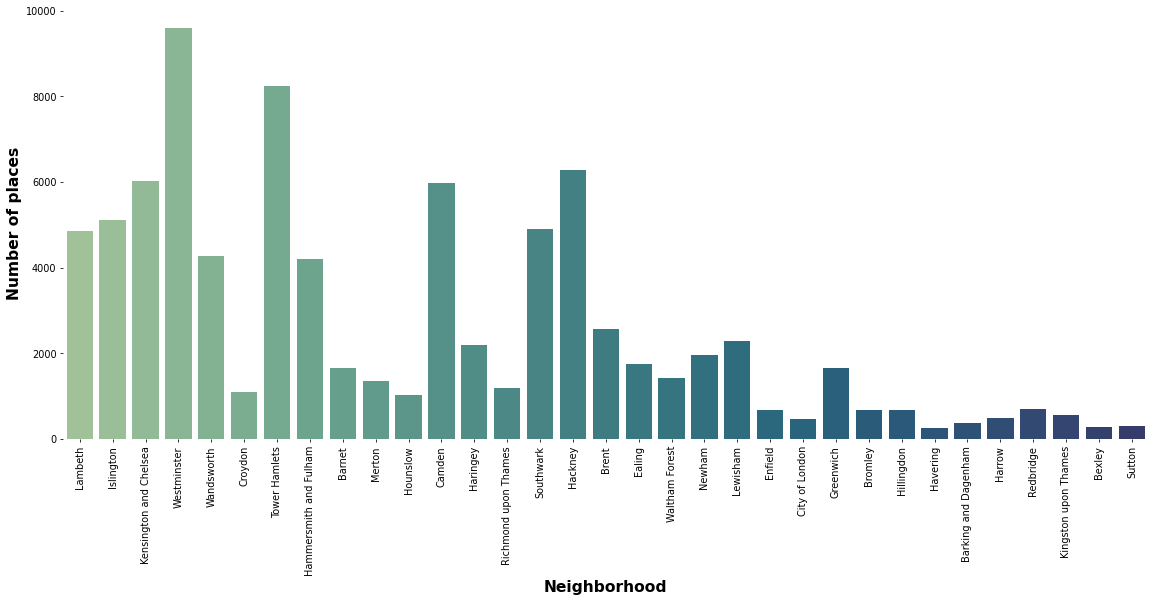

In [40]:
palette = 'crest'
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.countplot(x=df['neighbourhood'], ax = ax, palette=palette)
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Number of places', fontdict={'color':'black', 'weight':'bold', 'size': 16})

### Gráfico de Cajas de Precio por Noche en Diferentes Barrios

Text(0, 0.5, 'Price per night')

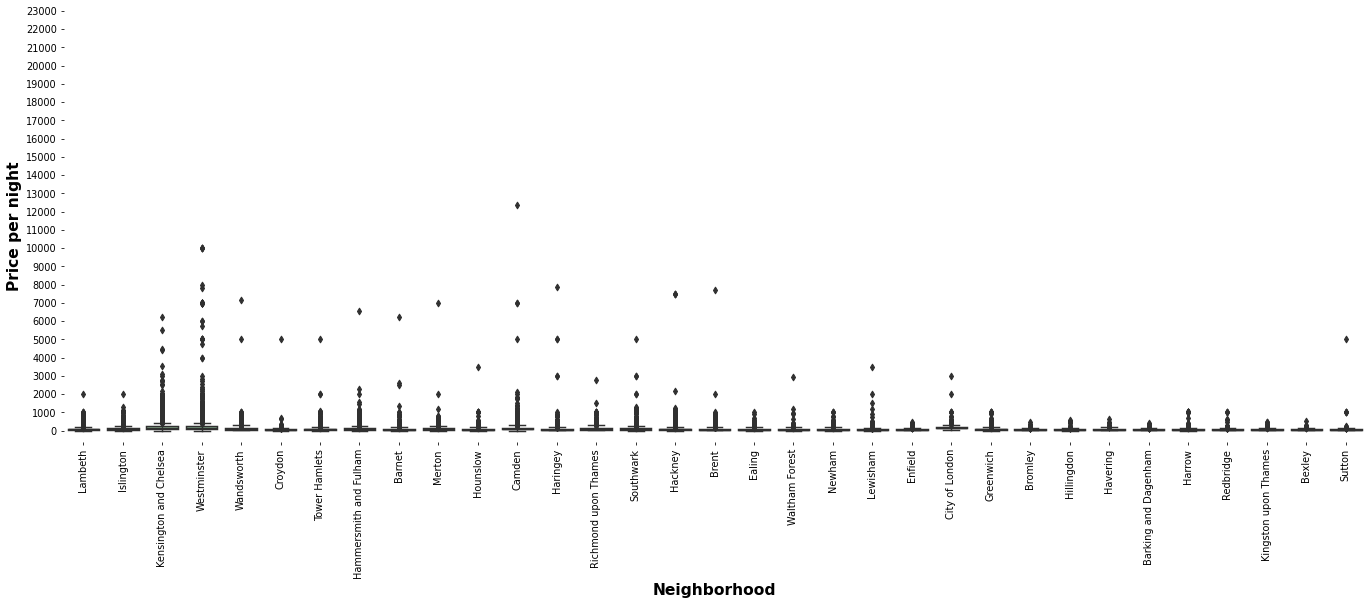

In [41]:
fig, ax = plt.subplots(figsize = (24,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.boxplot(y=df['price'] ,x=df['neighbourhood'], ax = ax, palette=palette)
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 23001, 1000))
ax.set_ylabel('Price per night', fontdict={'color':'black', 'weight':'bold', 'size': 16})

### Gráfico de Recuento de Tipos de Habitaciones por Barrio

Text(0, 0.5, 'Room type')

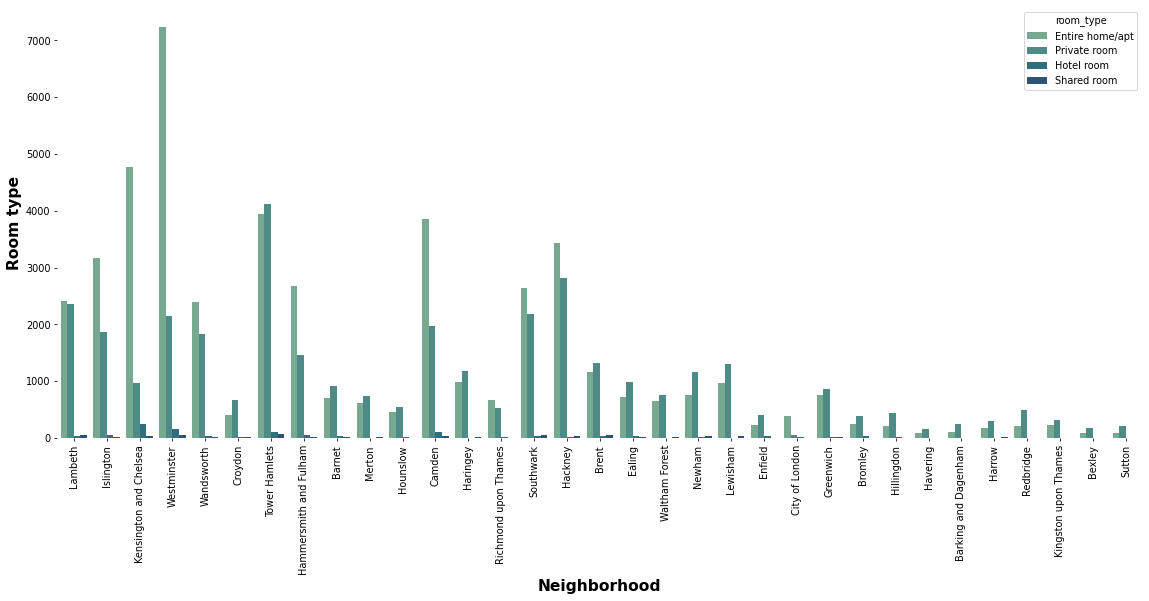

In [42]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.countplot(x=df['neighbourhood'], hue=df['room_type'] ,ax = ax, palette=palette)
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Room type', fontdict={'color':'black', 'weight':'bold', 'size': 16})


### Gráfico de Ingresos Esperados por Barrio (en miles)

Text(0, 0.5, 'Expected revenue (in thousands)')

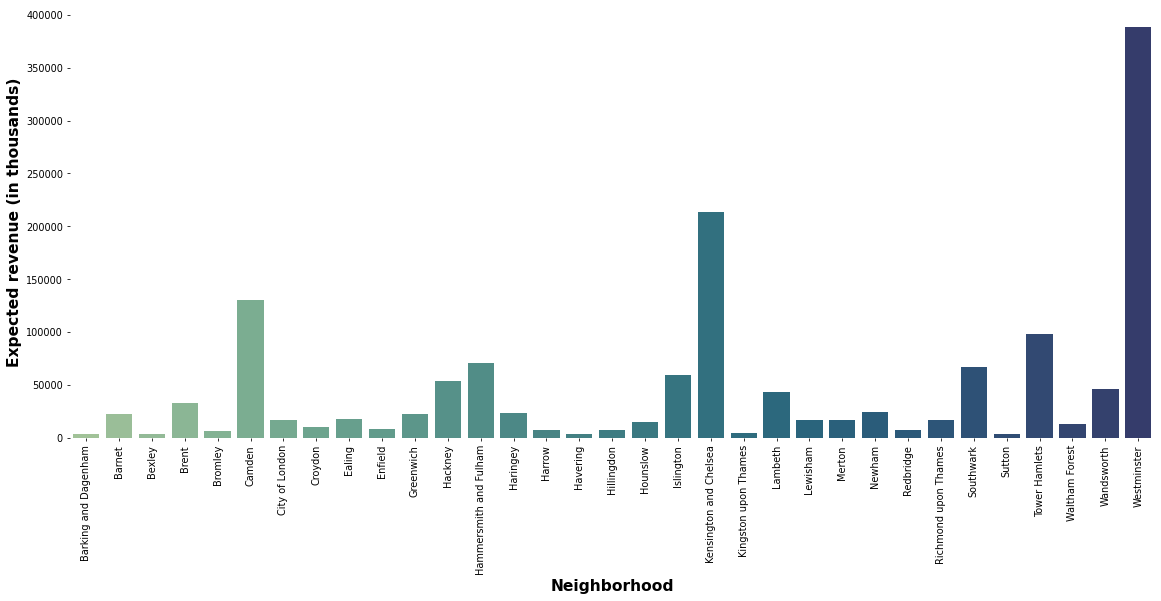

In [43]:
revenue_per_neighbourood = df.groupby('neighbourhood').sum()
revenue_per_neighbourood = revenue_per_neighbourood.rename_axis('neighbourhood').reset_index()
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.barplot(y=revenue_per_neighbourood['expected_revenue_in_1000'], x=revenue_per_neighbourood['neighbourhood'], ax = ax, palette=palette)
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Expected revenue (in thousands)', fontdict={'color':'black', 'weight':'bold', 'size': 16})

### Gráfico de Cajas de Número de Reseñas por Barrio

Text(0, 0.5, 'Number of reviews')

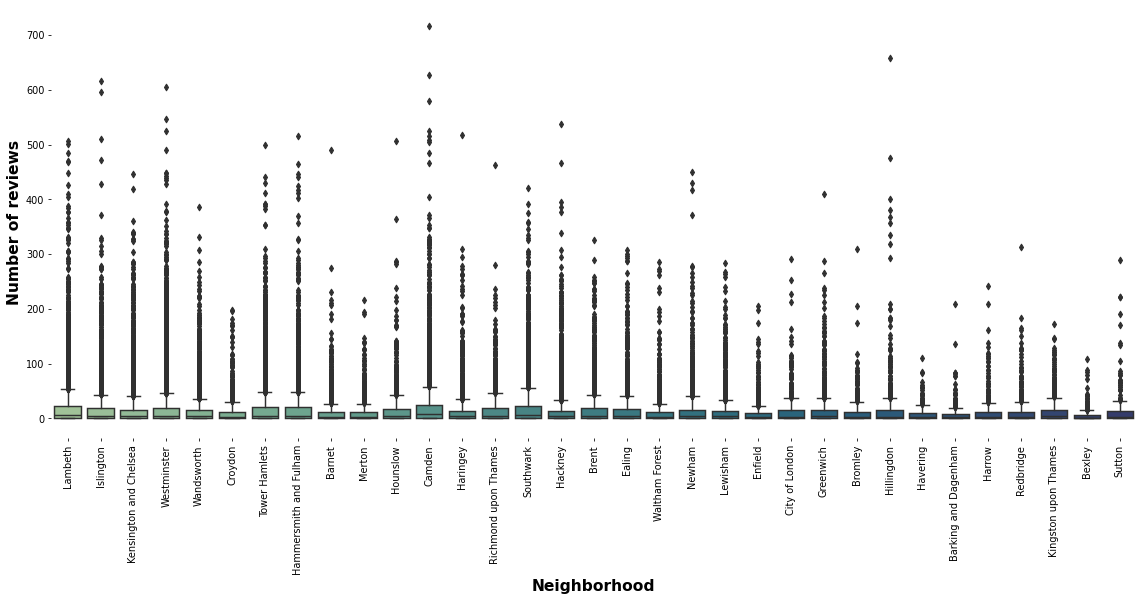

In [44]:
fig, ax = plt.subplots(figsize = (20,8), dpi = 70)
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)

sns.boxplot(y=df['number_of_reviews'], x=df['neighbourhood'], ax = ax, palette=palette)
ax.set_xlabel('Neighborhood', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.xticks(rotation=90)
ax.set_ylabel('Number of reviews', fontdict={'color':'black', 'weight':'bold', 'size': 16})

Operación de filtrado de datos en el DataFrame que muestra las filas donde el número de reseñas es mayor que 600

In [51]:
df[df['number_of_reviews']>600]

,id,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,expected_revenue_in_1000
1426,604185,Lovely Double in Islington Near tube. Zone 2,2990888,Marie,Islington,Private room,44,1,616,2019-10-29,1,117,5.148
2255,1231053,COSY DOUBLE ROOM in the Heart of London | SOHO,6599538,Allen,Westminster,Private room,68,1,606,2019-10-19,3,331,22.508
2550,1436172,Cosy Dble in Kings Cross Houseshare,7716401,Paul,Camden,Private room,79,1,716,2019-10-27,4,290,22.910
2551,1436177,En-suite Dbl @ Kings Cross Houshare,7716401,Paul,Camden,Private room,95,1,627,2019-10-29,4,307,29.165
12507,9046849,"Near HEATHROW AIRPORT, London, double room.",47205373,Ekaterina,Hillingdon,Private room,33,1,658,2019-10-20,1,132,4.356


Los 10 hosts con el mayor número de reseñas

In [52]:
hosts_reviews = df.groupby(['host_id']).sum().sort_values(by='number_of_reviews', ascending=False).iloc[:10]
hosts_reviews = hosts_reviews.rename_axis('host_id').reset_index()
id_name = df[['host_id', 'host_name']]
hosts_reviews = pd.merge(id_name, hosts_reviews, on='host_id').drop_duplicates().sort_values(by='number_of_reviews', ascending=False)
hosts_reviews

,host_id,host_name_x,id,name,host_name_y,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,expected_revenue_in_1000
460,136223256,Alvaro,2151265784,(ELS-1) PRIVATE ROOM FOR 2PPL CLOSE TO SHOREDI...,AlvaroAlvaroAlvaroAlvaroAlvaroAlvaroAlvaroAlva...,Tower HamletsTower HamletsTower HamletsTower H...,Private roomPrivate roomPrivate roomPrivate ro...,2587,191,6890,2019-09-242019-08-262019-10-312019-09-182019-0...,9604,26787,677.965
371,135969957,Emran,1985941808,(CROP-A)PRIVATE ROOM FOR 4 PEOPLE IN SHOREDITC...,EmranEmranEmranEmranEmranEmranEmranEmranEmranE...,HackneyHackneyHackneyHackneyHackneyHackneyTowe...,Private roomPrivate roomPrivate roomPrivate ro...,2350,173,5424,2019-10-282019-08-192019-10-302019-10-152019-1...,7921,28163,716.070
0,580475,Alessandro,862902544,Stunning Studio in Victoria 3ADouble studio in...,AlessandroAlessandroAlessandroAlessandroAlessa...,WestminsterWestminsterWestminsterWestminsterWe...,Entire home/aptPrivate roomEntire home/aptPriv...,6136,70,4582,2019-08-302019-09-262019-09-272019-09-292019-0...,2916,11899,1376.337
239,82436841,Max And Billie,316113254,Delightful Notting Hill StudioElegant Notting ...,Max And BillieMax And BillieMax And BillieMax ...,Kensington and ChelseaKensington and ChelseaKe...,Entire home/aptEntire home/aptEntire home/aptE...,1465,21,4355,2019-10-302019-10-302019-11-022019-10-252019-1...,441,3519,247.585
347,115300081,Dan,500331074,Dan's Shoreditch Studio 9A - 2nd floor rearDan...,DanDanDanDanDanDanDanDanDanDanDanDanDanDanDanD...,HackneyHackneyHackneyHackneyHackneyHackneyHack...,Entire home/aptEntire home/aptEntire home/aptE...,1960,113,4324,2019-11-032019-10-312019-10-312019-11-052019-1...,576,2284,173.221
67,26379342,Stefano,951898264,Double Room 01 - near Tower of London & Shored...,StefanoStefanoStefanoStefanoStefanoStefanoStef...,Tower HamletsTower HamletsTower HamletsTower H...,Private roomPrivate roomPrivate roomPrivate ro...,1534,32,3141,2019-10-222019-10-172019-10-222019-09-062019-1...,1024,3715,167.254
54,14183645,Edison,153350414,1. Lovely Single Room close Center1. Beautiful...,EdisonEdisonEdisonEdisonEdisonEdisonEdisonEdis...,LewishamLewishamLewishamLewishamSouthwarkSouth...,Private roomPrivate roomPrivate roomPrivate ro...,621,14,3123,2019-11-022019-09-262019-10-212019-09-212019-1...,169,3920,189.856
138,83740964,Ali,2426594367,"1 Bedroom Flat in Bayswater, Hyde Park, London...",AliAliAliAliAliAliAliAliAliAliAliAliAliAliAliA...,WestminsterWestminsterWestminsterWestminsterWe...,Entire home/aptEntire home/aptEntire home/aptE...,9843,1691,3070,2019-09-212019-08-272019-09-262019-08-272019-1...,10201,7084,600.271
260,111291126,Alice,1653841941,Brick Lane Shoreditch SanctuaryBrick Lane Shor...,AliceAliceAliceAliceAliceAliceAliceAliceAliceA...,Tower HamletsTower HamletsTower HamletsTower H...,Entire home/aptEntire home/aptEntire home/aptE...,8969,87,3023,2018-09-012018-09-222018-09-232018-05-272018-0...,7569,882,100.555
99,56784981,DC Partners,822174013,Spacious room as a base in London (FPR R5)Exec...,DC PartnersDC PartnersDC PartnersDC PartnersDC...,Hammersmith and FulhamHammersmith and FulhamHa...,Private roomPrivate roomPrivate roomPrivate ro...,900,39,3009,2019-10-272019-10-202019-10-282019-11-032019-1...,1521,13627,313.160


Primer Paso y Tabla. Outliers

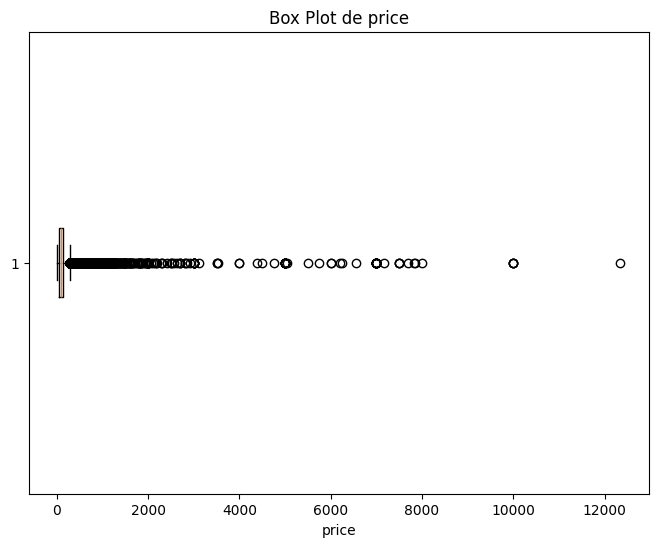

Resumen estadístico:
count    85068.000000
mean       122.336766
std        220.749123
min          0.000000
25%         47.000000
50%         84.000000
75%        140.000000
max      12345.000000
Name: price, dtype: float64

Límite inferior para outliers: -92.5
Límite superior para outliers: 279.5

Cantidad de outliers: 5659

Valores atípicos:
5         300
15        296
22        300
47        400
131      1000
         ... 
84999     600
85019     450
85020     325
85030     469
85038     498
Name: price, Length: 5659, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
data = pd.read_csv("london_airbnb.csv")

# Seleccionar la columna de interés para identificar outliers, por ejemplo, el precio (price)
column_name = 'price'
data_column = data[column_name]

# Calcular estadísticas resumidas para comprender mejor los datos
summary_stats = data_column.describe()

# Calcular el rango intercuartil (IQR)
Q1 = data_column.quantile(0.25)
Q3 = data_column.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
outliers = data_column[(data_column < lower_limit) | (data_column > upper_limit)]

# Visualizar los outliers usando un box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data_column, vert=False)
plt.title(f'Box Plot de {column_name}')
plt.xlabel(column_name)
plt.show()

# Mostrar información sobre los outliers y su razón de existencia
print("Resumen estadístico:")
print(summary_stats)
print("\nLímite inferior para outliers:", lower_limit)
print("Límite superior para outliers:", upper_limit)
print("\nCantidad de outliers:", len(outliers))
print("\nValores atípicos:")
print(outliers)







Calcular el rango intercuartilico

In [10]:
def outliers(df, columna):
    # Calcula el primer cuartil (Q1)
    q1 = df[columna].quantile(0.25)

    # Calcula el tercer cuartil (Q3)
    q3 = df[columna].quantile(0.75)

    # Calcula el IQR
    iqr = q3 - q1

    # Imprime los valores de Q1, Q3 y el IQR
    print("Q1:", q1)
    print("Q3:", q3)
    print("IQR:", iqr)

    # Calcula los límites inferior y superior del rango válido
    inferior = q1 - 1.5 * iqr
    superior = q3 + 1.5 * iqr

    # Sustituye los valores fuera del rango con los límites
    df[columna] = df[columna].apply(lambda x: inferior if x < inferior else (superior if x > superior else x))

    return df

df = outliers(df, 'price')

Q1: 47.0
Q3: 140.0
IQR: 93.0


In [25]:
Q1 = estadisticas_resumidas.loc['25%', :]
Q3 = estadisticas_resumidas.loc['75%', :]
IQR = Q3 - Q1

c:\Users\alber\Data_Analyst\london\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



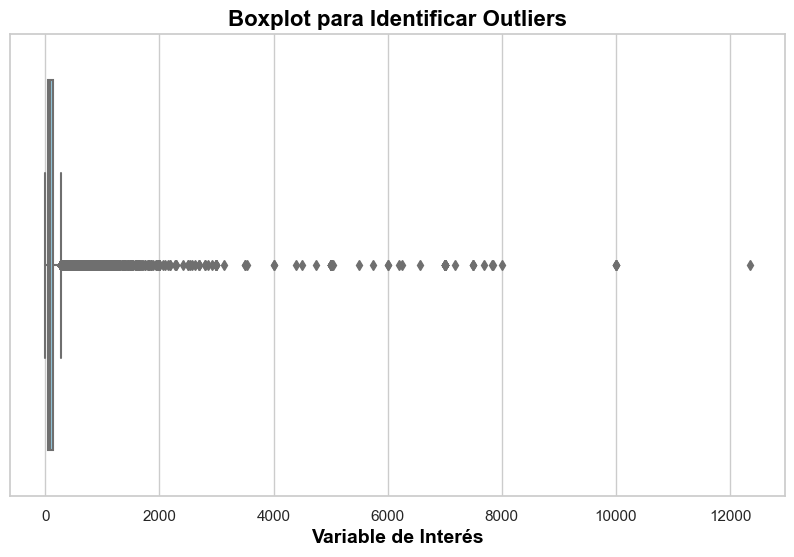

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'], color='skyblue')
plt.xlabel('Variable de Interés', fontdict={'color':'black', 'weight':'bold', 'size': 14})
plt.title('Boxplot para Identificar Outliers', fontdict={'color':'black', 'weight':'bold', 'size': 16})
plt.show()

In [16]:
barrios_interes = data.loc[data['neighbourhood'].isin(['Camden', 'Hillingdon'])]

In [19]:
estadisticas_resumidas = barrios_interes.describe()

In [23]:
Q1 = estadisticas_resumidas.loc['25%', :]
Q3 = estadisticas_resumidas.loc['75%', :]
IQR = Q3 - Q1

Hipotesis y teorias sobre los outliers. Camden y Hillingdnton

Oferta y Demanda: Existe una alta demanda de alojamientos en estos lugares debido a atracciones turísticas o eventos locales sobretodo si ponemos el foco en Camden, el cual es quizás el barrio que más situado cerca del centro y las partes más conocida de la ciudad, por la zona lo que aumenta significativamente los precios.

Temporada: Los outliers podrían estar relacionados con la temporada. Por ejemplo, los precios pueden aumentar significativamente durante las temporadas turísticas o eventos especiales en estos barrios.

Alojamientos de Lujo: Pueden existir alojamientos de lujo o propiedades únicas en estos barrios que se alquilan a precios mucho más altos que la media. Estos podrían incluir penthouses, casas históricas, o propiedades con comodidades excepcionales.

Ubicación Estratégica: La ubicación de estos barrios en relación con las atracciones turísticas, el transporte público o el centro de la ciudad podría influir en los precios. Los lugares convenientemente ubicados tienden a tener precios más altos.

Comodidades y Servicios: La disponibilidad de comodidades como restaurantes de alta gama, tiendas exclusivas u otros servicios en estos barrios podría contribuir a precios más altos.

Excepciones Geográficas: Algunos barrios pueden tener características geográficas únicas, como vistas panorámicas, proximidad a parques o cuerpos de agua, lo que podría justificar precios más altos.

Eventos Locales: Eventos locales, como festivales, conferencias o ferias, pueden aumentar temporalmente los precios de los alojamientos en estos barrios.